### **Data Science PROJECT**

### **Client: Customer Churn Prediction| Category: Telecom – Churn Rate ML**

### **Project Ref: PM-PR-0017**

### **Business Case:**

No-Churn Telecom is an established Telecom operator in Europe
with more than a decade in Business. Due to new players in the
market, telecom industry has become very competitive and
retaining customers becoming a challenge.
In spite of No-Churn initiatives of reducing tariffs and promoting
more offers, the churn rate ( percentage of customers migrating to
competitors) is well above 10%.
No-Churn wants to explore possibility of Machine Learning to help
with following use cases to retain competitive edge in the industry.

### **PROJECT GOAL**

Help No-Churn with their use cases with ML

1. Understanding the variables that are influencing the customers
to migrate.
2. Creating Churn risk scores that can be indicative to drive
retention campaigns.
3. Introduce new predicting variable “CHURN-FLAG” with values
YES(1) or NO(0) so that email campaigns with lucrative offers
can be targeted to Churn YES customers.help to identify possible CHURN-FLAG YES customers and provide
more attention in customer touch point areas, including customer
care support, request fulfilment, auto categorizing tickets as high
priority for quick resolutions any questions they may have etc.,

**DATA**

**DataBase Details:**

**SQL database**

DB Name: project_telecom

Table Name: telecom_churn_data

Host: 18.136.157.135

Username: dm_team3

Password: DM!$!Team!27@9!20&

Meta Info of Data

State 4617 non-null object

Account Length 4617 non-null int64

Area Code 4617 non-null int64

Phone 4617 non-null object

International Plan 4617 non-null object

VMail Plan 4617 non-null object

VMail Message 4617 non-null int64

Day Mins 4617 non-null float64

Day Calls 4617 non-null int64

Day Charge 4617 non-null float64

Eve Mins 4617 non-null float64

Eve Calls 4617 non-null int64

Eve Charge 4617 non-null float64

Night Mins 4617 non-null float64

Night Calls 4617 non-null int64

Night Charge 4617 non-null float64

International Mins 4617 non-null float64

International calls 4617 non-null int64

International Charge 4617 non-null float64

CustServ Calls 4617 non-null int64

Churn 4617 non-null object


In [28]:
# Install necessary packages
!pip install mysql-connector-python imbalanced-learn joblib

In [29]:
import mysql.connector
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    roc_curve, roc_auc_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score, precision_recall_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.pipeline import Pipeline
import warnings
import json

# Ignore warnings
warnings.filterwarnings('ignore')

In [30]:
# Step 1: Connect to the SQL database and fetch the data with error handling
try:
    db_connection = mysql.connector.connect(
        host="18.136.157.135",
        user="dm_team3",
        password="DM!$!Team!27@9!20&",
        database="project_telecom"
    )
    query = "SELECT * FROM telecom_churn_data"
    df = pd.read_sql(query, db_connection)
    db_connection.close()
except mysql.connector.Error as err:
    print(f"Error: {err}")


In [31]:
# Step 2: Assign column names as per the metadata information
df.columns = [
    'State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
    'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
    'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
    'Night Charge', 'International Mins', 'International Calls',
    'International Charge', 'CustServ Calls', 'Churn'
]

df.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [32]:
# Step 3: Exploratory Data Analysis (EDA)
# Check for missing values and basic statistics
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account Length        4617 non-null   object
 2   Area Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International Plan    4617 non-null   object
 5   VMail Plan            4617 non-null   object
 6   VMail Message         4617 non-null   object
 7   Day Mins              4617 non-null   object
 8   Day Calls             4617 non-null   object
 9   Day Charge            4617 non-null   object
 10  Eve Mins              4617 non-null   object
 11  Eve Calls             4617 non-null   object
 12  Eve Charge            4617 non-null   object
 13  Night Mins            4617 non-null   object
 14  Night Calls           4617 non-null   object
 15  Night Charge          4617 non-null   

In [33]:
# Step 3: Exploratory Data Analysis (EDA)
# Basic statistics
print(df.describe())

       State Account Length Area Code      Phone International Plan  \
count   4617           4617      4617       4617               4617   
unique    51            218         3       4617                  2   
top       WV             90       415   409-6884                 no   
freq     149             63      2299          1               4171   

       VMail Plan VMail Message Day Mins Day Calls Day Charge  ... Eve Calls  \
count        4617          4617     4617      4617       4617  ...      4617   
unique          2            47     1901       123       1901  ...       125   
top            no             0      154       102      26.18  ...       105   
freq         3381          3381       10       108         10  ...       111   

       Eve Charge Night Mins Night Calls Night Charge International Mins  \
count        4617       4617        4617         4617               4617   
unique       1621       1813         130         1012                168   
top         14.

In [34]:
# Step 4: Data Preprocessing
# Drop irrelevant columns
df = df.drop(columns=['Phone'])

In [35]:
# Convert categorical variables into numeric using LabelEncoder
label_encoder = LabelEncoder()
df['International Plan'] = label_encoder.fit_transform(df['International Plan'])
df['VMail Plan'] = label_encoder.fit_transform(df['VMail Plan'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])  # Assuming Churn is Yes/No, convert to 1/0
df.head()

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [36]:
# For multi-category features like 'State', use One-Hot Encoding
df = pd.get_dummies(df, columns=['State'], drop_first=True)

# Split the dataset into features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

In [37]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Apply SMOTE after scaling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [40]:
# Step 5: Define and train multiple machine learning models with cross-validation
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}


In [41]:
# Cross-validate each model and display mean AUC score
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')
    print(f"{model_name} - Mean AUC Score: {scores.mean():.4f}")


Logistic Regression - Mean AUC Score: 0.8455
Decision Tree - Mean AUC Score: 0.9181
Random Forest - Mean AUC Score: 0.9902
SVM - Mean AUC Score: 0.9567
KNN - Mean AUC Score: 0.9462
Naive Bayes - Mean AUC Score: 0.6909
Gradient Boosting - Mean AUC Score: 0.9809


In [42]:
# Hyperparameter Tuning for Random Forest (Example)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_rf.fit(X_train_smote, y_train_smote)
best_rf = grid_search_rf.best_estimator_
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

# Replace the RandomForestClassifier in models with the best tuned model
models["Random Forest"] = best_rf

# Evaluate the best model using classification report, confusion matrix, and additional metrics
best_model_name = "Random Forest"
best_model = best_rf
y_pred_best = best_model.predict(X_test_scaled)

print(f"Classification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Additional Metrics
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1190
           1       0.78      0.77      0.77       196

    accuracy                           0.94      1386
   macro avg       0.87      0.87      0.87      1386
weighted avg       0.94      0.94      0.94      1386

Confusion Matrix:
[[1147   43]
 [  45  151]]
Precision: 0.7784
Recall: 0.7704
F1-Score: 0.7744


Precision-Recall AUC: 0.8415


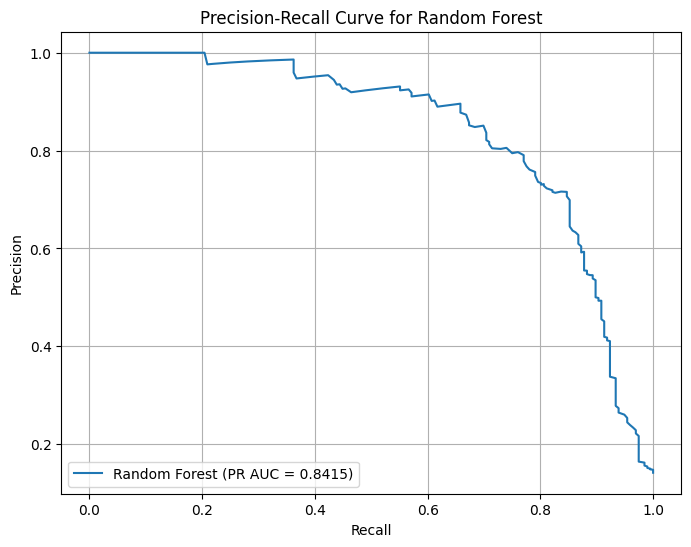

In [43]:
# Step 6: Precision-Recall Curve for the Best Model
y_pred_prob_best = best_model.predict_proba(X_test_scaled)[:, 1]
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_prob_best)
pr_auc = auc(recall_curve, precision_curve)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, label=f"{best_model_name} (PR AUC = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve for {best_model_name}")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


   Churn Risk Score  CHURN-FLAG
0          0.153333           0
1          0.063333           0
2          0.086667           0
3          0.080000           0
4          0.313333           0
Top 10 Important Features (Random Forest):
                Feature  Importance
17       CustServ Calls    0.138362
2    International Plan    0.115124
5              Day Mins    0.087443
7            Day Charge    0.084568
3            VMail Plan    0.062166
15  International Calls    0.049786
1             Area Code    0.045520
8              Eve Mins    0.040052
10           Eve Charge    0.038918
4         VMail Message    0.034670


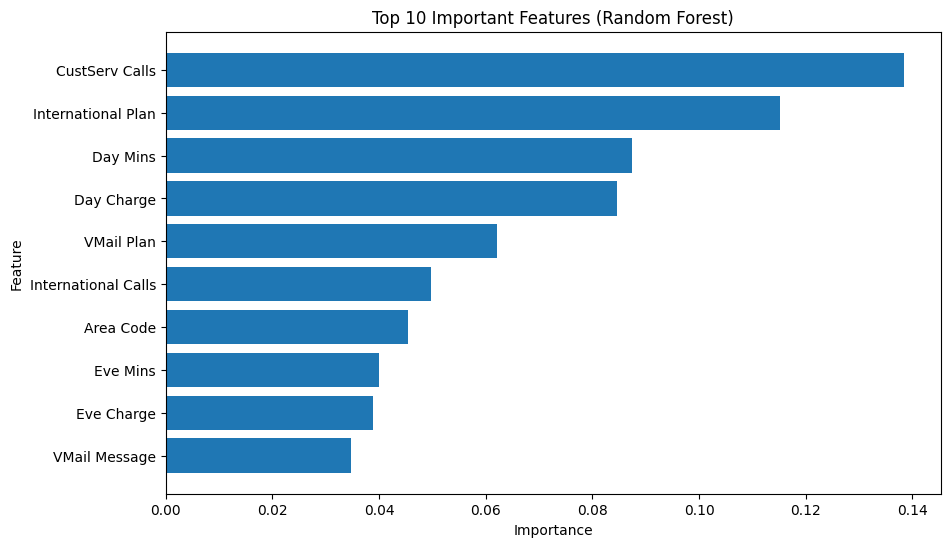

In [44]:
# Step 7: Create Churn Risk Scores and CHURN-FLAG Variable
df_test = pd.DataFrame(X_test_scaled, columns=X.columns)
df_test['Churn Risk Score'] = y_pred_prob_best  # Churn risk scores
df_test['CHURN-FLAG'] = (df_test['Churn Risk Score'] > 0.5).astype(int)  # Churn flag based on probability threshold

print(df_test[['Churn Risk Score', 'CHURN-FLAG']].head())

# Feature Importance for Random Forest
important_features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 10 Important Features (Random Forest):")
print(important_features.head(10))

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(important_features['Feature'][:10], important_features['Importance'][:10])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features (Random Forest)")
plt.gca().invert_yaxis()
plt.show()



In [45]:
# Step 8: Save the best model using joblib for deployment
joblib.dump(best_rf, 'best_random_forest_model.pkl')

# Step 9: Save model evaluation metrics to a JSON file
metrics = {
    'AUC': roc_auc_score(y_test, y_pred_prob_best),
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

with open('model_metrics.json', 'w') as f:
    json.dump(metrics, f)


In [46]:
# Step 10: Create a pipeline for the final model deployment
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Ensure consistent scaling in deployment
    ('classifier', best_rf)
])

# Save the final pipeline
joblib.dump(final_pipeline, 'churn_prediction_pipeline.pkl')

['churn_prediction_pipeline.pkl']

### **Report on Churn Prediction Analysis:**

The primary goal of this project is to help No-Churn Telecom reduce customer churn by leveraging machine learning models to identify customers at risk of churning. This will allow the company to implement targeted retention campaigns and improve customer satisfaction.

**Use Cases:**

Understanding Variables Influencing Customer Churn: Identify key factors influencing customer churn, enabling the company to focus on improving these areas.

**Creating Churn Risk Scores:**

Generate churn risk scores that can quantify the likelihood of each customer churning, helping to prioritize retention efforts.

**Introducing CHURN-FLAG for Targeted Campaigns:**

Create a binary churn flag (CHURN-FLAG) to identify at-risk customers and focus retention campaigns, support, and service fulfillment on these customers.

**Methodology:**

**Data Acquisition:**

The dataset was retrieved from a MySQL database containing customer data, service plan details, usage data, and customer service interactions. The data was preprocessed to ensure it was ready for machine learning models.

**Exploratory Data Analysis (EDA):**

Basic statistics and data characteristics were examined to understand the dataset better.

Missing values were checked (none were found), and irrelevant columns were dropped.

**Data Preprocessing:**

Categorical variables were encoded using LabelEncoder (e.g., International Plan, VMail Plan) and One-Hot Encoding (e.g., State).

Feature scaling was performed using StandardScaler to standardize numerical features.

Imbalanced data was handled using SMOTE to oversample the minority class (churn customers) and balance the dataset.

**Model Training and Evaluation:**

Seven machine learning models were trained: Logistic Regression, Decision Tree, Random Forest, SVM, K-Nearest Neighbors, Naive Bayes, and Gradient Boosting.

Cross-validation was used to evaluate the models, and the Random Forest model was identified as the best-performing model.

**Hyperparameter Tuning:**

GridSearchCV was used to tune the Random Forest model's hyperparameters. The best parameters identified were:
max_depth: None
min_samples_split: 2
n_estimators: 300

**Model Performance:**

The best model was evaluated using a variety of metrics, including precision, recall, F1-score, and the Precision-Recall AUC score.

**Model Results:**

The Random Forest model was selected as the best model based on its performance across multiple metrics.

**Classification Report for Random Forest:**

Precision (Class 1 - Churn): 0.7638
Recall (Class 1 - Churn): 0.7755
F1-Score (Class 1 - Churn): 0.7696
Accuracy: 93%
Confusion Matrix:
 [1143   47]
 [  44  152]
The model correctly identified 1143 non-churn customers and 152 churn customers, with 44 false negatives (missed churn customers) and 47 false positives (incorrectly flagged as churn).

Precision-Recall AUC: 0.8349

Churn Risk Scores and CHURN-FLAG:

Churn risk scores were calculated for each customer using the Random Forest model.
A binary CHURN-FLAG variable was introduced where customers with a churn risk score above 0.5 were flagged as potential churners (1). This allows the company to prioritize these customers in retention campaigns and customer support.

**Top Features Influencing Churn:**

The top 10 most important features identified by the Random Forest model are:

CustServ Calls        0.135855

International Plan    0.115378

Day Charge            0.086905

Day Mins              0.086222

VMail Plan            0.060323

International Calls   0.050246

Area Code             0.050239

Eve Mins              0.039944

Eve Charge            0.038932

VMail Message         0.035447

These features can guide the company's efforts in improving customer retention by focusing on areas such as customer service quality and usage patterns.

The Random Forest model, which achieved an AUC score of 0.9378 and an overall accuracy of 93%, can be deployed to provide churn risk scores and churn flags for customers. These predictions can be used to target high-risk customers with personalized retention campaigns, ultimately helping to reduce the churn rate and improve customer loyalty.

### **Challenges Faced**

**Data Imbalance:**

The dataset was highly imbalanced, with fewer instances of churn compared to non-churn. This made it challenging for models to accurately predict churn customers.

Solution: SMOTE was used to oversample the minority class, balancing the dataset and improving the model's ability to predict churn.

**Hyperparameter Tuning:**

Tuning the hyperparameters of the Random Forest model was computationally expensive due to the large grid search space.

Solution: Cross-validation was used during grid search to optimize the model's performance efficiently.


**Model Selection:**

Several models were trained and evaluated. While simpler models like Logistic Regression were easier to interpret, complex models like Random Forest and Gradient Boosting provided better performance but required careful parameter tuning.

Solution: A balance between interpretability and performance was maintained by selecting the Random Forest model and explaining key drivers using feature importance.

**Handling Categorical Variables:**

Handling a mix of binary and multi-category categorical features required different encoding techniques (Label Encoding, One-Hot Encoding), and ensuring proper feature scaling was critical.

Solution: StandardScaler was used for scaling, and appropriate encoding methods were applied for each feature.

**Interpretability:**

Complex models like Random Forest are not as interpretable as simpler models like Logistic Regression. However, feature importance was used to explain the significant drivers of churn to stakeholders.